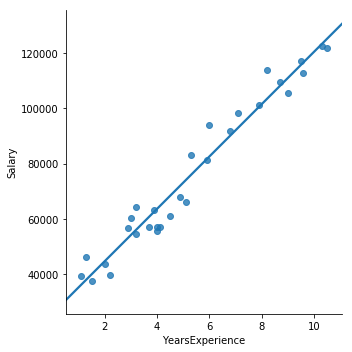

In [2]:
# 工作年限与收入之间的散点图
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 导入数据集
income = pd.read_csv(r'Salary_Data.csv')
# 绘制散点图
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = income, ci = None)
# 显示图形
plt.show()

In [5]:
income.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
income.YearsExperience.pow(2).sum()

1080.5

In [16]:
a = income.YearsExperience**2
sum(a)

1080.5

In [3]:
# 简单线性回归模型的参数求解
# 样本量
n = income.shape[0]

# 计算自变量、因变量、自变量平方、自变量与因变量乘积的和
sum_x = income.YearsExperience.sum()
sum_y = income.Salary.sum()
sum_x2 = income.YearsExperience.pow(2).sum()
xy = income.YearsExperience * income.Salary
sum_xy = xy.sum()

# 根据公式计算回归模型的参数
b = (sum_xy-sum_x*sum_y/n)/(sum_x2-sum_x**2/n)
a = income.Salary.mean()-b*income.YearsExperience.mean()

# 打印出计算结果
print('回归参数a的值：',a)
print('回归参数b的值：',b)

回归参数a的值： 25792.200198668666
回归参数b的值： 9449.962321455081


In [19]:
# 导入第三方模块
import statsmodels.api as sm
# 利用收入数据集，构建回归模型
fit = sm.formula.ols('Salary ~ YearsExperience', data = income).fit()
# 返回模型的参数值
fit.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [22]:
Profit = pd.read_excel(r'Predict to Profit.xlsx')
Profit.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
# 多元线性回归模型的构建和预测
# 导入模块
from sklearn import model_selection

# 导入数据
Profit = pd.read_excel(r'Predict to Profit.xlsx')

# 将数据集拆分为训练集和测试集
train, test = model_selection.train_test_split(Profit, test_size = 0.2, random_state=1234)

# 根据train数据集建模
model = sm.formula.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + C(State)', 
                       data = train).fit()
print('模型的偏回归系数分别为：\n', model.params)

# 删除test数据集中的Profit变量，用剩下的自变量进行预测
test_X = test.drop(labels = 'Profit', axis = 1)
pred = model.predict(exog = test_X)
print('对比预测值和实际值的差异：\n',pd.DataFrame({'Prediction':pred,'Real':test.Profit}))

模型的偏回归系数分别为：
 Intercept               58581.516503
C(State)[T.Florida]       927.394424
C(State)[T.New York]     -513.468310
RD_Spend                    0.803487
Administration             -0.057792
Marketing_Spend             0.013779
dtype: float64
对比预测值和实际值的差异：
        Prediction       Real
8   150621.345801  152211.77
48   55513.218079   35673.41
14  150369.022458  132602.65
42   74057.015562   71498.49
29  103413.378282  101004.64
44   67844.850378   65200.33
4   173454.059691  166187.94
31   99580.888894   97483.56
13  128147.138396  134307.35
18  130693.433835  124266.90


In [33]:
dummies = pd.get_dummies(Profit.State)
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [34]:
pd.concat([Profit,dummies], axis = 1).head()

,RD_Spend,Administration,Marketing_Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [35]:
# 生成由State变量衍生的哑变量
dummies = pd.get_dummies(Profit.State)
# 将哑变量与原始数据集水平合并
Profit_New = pd.concat([Profit,dummies], axis = 1)
# 删除State变量和New York变量（因为State变量已被分解为哑变量，New York变量需要作为参照组）
Profit_New.drop(labels = ['State','New York'], axis = 1, inplace = True)

# 拆分数据集Profit_New
train, test = model_selection.train_test_split(Profit_New, test_size = 0.2, random_state=1234)
# 建模
model2 = sm.formula.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + Florida + California', 
                        data = train).fit()
print('模型的偏回归系数分别为：\n', model2.params)

模型的偏回归系数分别为：
 Intercept          58068.048193
RD_Spend               0.803487
Administration        -0.057792
Marketing_Spend        0.013779
Florida             1440.862734
California           513.468310
dtype: float64


In [38]:
model2.df_model

5.0

In [36]:
# 导入第三方模块
import numpy as np
# 计算建模数据中，因变量的均值
ybar = train.Profit.mean()

# 统计变量个数和观测个数
p = model2.df_model
n = train.shape[0]

# 计算回归离差平方和
RSS = np.sum((model2.fittedvalues-ybar) ** 2)  # model2.fittedvalues = yi_hat
# 计算误差平方和
ESS = np.sum(model2.resid ** 2)   # model2.resid = yi-yi_hat
# 计算F统计量的值
F = (RSS/p)/(ESS/(n-p-1))
print('F统计量的值：',F)

F统计量的值： 174.63721716844725


In [55]:
n
p

39

5.0

In [46]:
%config ZMQInteractiveShell.ast_node_interactivity='all'   # nootbook使用

In [52]:
train.Profit.head()
model2.predict(exog = train).head()
(train.Profit - model2.predict(exog = train)).head()

model2.resid.head()

36     90708.19
43     69758.98
17    125370.37
10    146121.95
21    111313.02
Name: Profit, dtype: float64

36     77968.370339
43     63654.604454
17    129633.112374
10    138160.890451
21    116296.182685
dtype: float64

36    12739.819661
43     6104.375546
17    -4262.742374
10     7961.059549
21    -4983.162685
dtype: float64

36    12739.819661
43     6104.375546
17    -4262.742374
10     7961.059549
21    -4983.162685
dtype: float64

In [39]:
model2.fvalue

174.6372171570355

In [53]:
# 导入模块
from scipy.stats import f
# 计算F分布的理论值
F_Theroy = f.ppf(q=0.95, dfn = p,dfd = n-p-1)
print('F分布的理论值为：',F_Theroy)

F分布的理论值为： 2.502635007415366


In [57]:
# 模型的概览信息
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           9.74e-23
Time:                        21:36:07   Log-Likelihood:                -401.20
No. Observations:                  39   AIC:                             814.4
Df Residuals:                      33   BIC:                             824.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.807e+04   6846.305      8.482      0.000    4.41e+04     7.2e+04
RD_Spend            0.8035      0.040     19.988      0.000       0.722       0.885
Administration     -0.0578      0.051     -1.133      0.265      -0.162       0.046
Marketing_Spend     0.0138      0.015      0.930      0.359      -0.016       0.044
Florida          1440.8627   3059.931      0.471      0.641   -4784.615    7666.340
California        513.4683   3043.160      0.169      0.867   -5677.887    6704.824
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.148
Skew:                           0.096   Prob(JB):                        0.563
Kurtosis:                       2.182   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
Profit_New.head()

,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


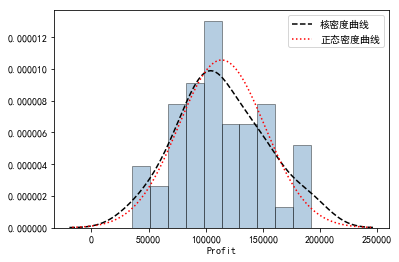

In [61]:
# 忽略警告
import warnings
warnings.filterwarnings('ignore')

# 正态性检验
# 直方图法
# 导入第三方模块
import scipy.stats as stats
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制直方图
sns.distplot(a = Profit_New.Profit, bins = 10, fit = stats.norm, norm_hist = True,
             hist_kws = {'color':'steelblue', 'edgecolor':'black'}, 
             kde_kws = {'color':'black', 'linestyle':'--', 'label':'核密度曲线'}, 
             fit_kws = {'color':'red', 'linestyle':':', 'label':'正态密度曲线'})
# 显示图例
plt.legend()
# 显示图形
plt.show()

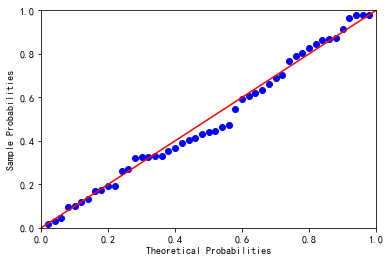

Text(0.5, 1.0, 'P-P图')

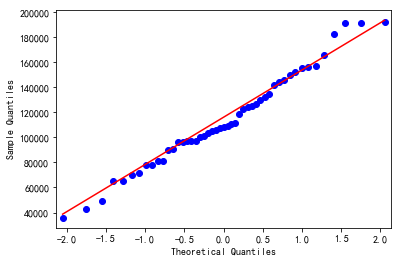

Text(0.5, 1.0, 'Q-Q图')

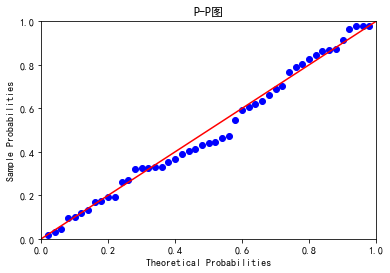

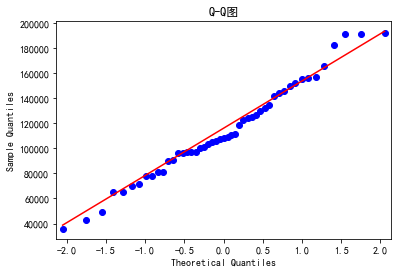

In [70]:
# 残差的正态性检验（PP图和QQ图法）
pp_qq_plot = sm.ProbPlot(Profit_New.Profit)
# 绘制PP图
pp_qq_plot.ppplot(line = '45')
plt.title('P-P图')
# 绘制QQ图
pp_qq_plot.qqplot(line = 'q')
plt.title('Q-Q图')
# 显示图形
plt.show()

In [72]:
# 导入模块
import scipy.stats as stats
stats.shapiro(Profit_New.Profit)   # 数据量少于5000，用shapiro检验法，否则K-S检验法

(0.9793398380279541, 0.537902295589447)

In [73]:
# 生成正态分布和均匀分布随机数
rnorm = np.random.normal(loc = 5, scale=2, size = 10000)
runif = np.random.uniform(low = 1, high = 100, size = 10000)
# 正态性检验
KS_Test1 = stats.kstest(rvs = rnorm, args = (rnorm.mean(), rnorm.std()), cdf = 'norm')
KS_Test2 = stats.kstest(rvs = runif, args = (runif.mean(), runif.std()), cdf = 'norm')
print(KS_Test1)
print(KS_Test2)

KstestResult(statistic=0.00550713869705155, pvalue=0.9220980369797864)
KstestResult(statistic=0.061659126362853756, pvalue=1.8993238848354596e-33)


In [80]:
# 多重共线性检验
# 导入statsmodels模块中的函数
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 自变量X(包含RD_Spend、Marketing_Spend和常数列1)
X = sm.add_constant(Profit_New.ix[:,['RD_Spend','Marketing_Spend']])
X.head()

# 构造空的数据框，用于存储VIF值
vif = pd.DataFrame()
vif["features"] = X.columns

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 返回VIF值
vif

,const,RD_Spend,Marketing_Spend
0,1.0,165349.20,471784.10
1,1.0,162597.70,443898.53
2,1.0,153441.51,407934.54
3,1.0,144372.41,383199.62
4,1.0,142107.34,366168.42


,features,VIF Factor
0,const,4.540984
1,RD_Spend,2.026141
2,Marketing_Spend,2.026141


In [84]:
Profit_New.head()
Profit_New.drop('Profit', axis = 1).head()

,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


,RD_Spend,Administration,Marketing_Spend,California,Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


In [81]:
# 计算数据集Profit_New中每个自变量与因变量利润之间的相关系数
Profit_New.drop('Profit', axis = 1).corrwith(Profit_New.Profit)

RD_Spend           0.978437
Administration     0.205841
Marketing_Spend    0.739307
California        -0.083258
Florida            0.088008
dtype: float64

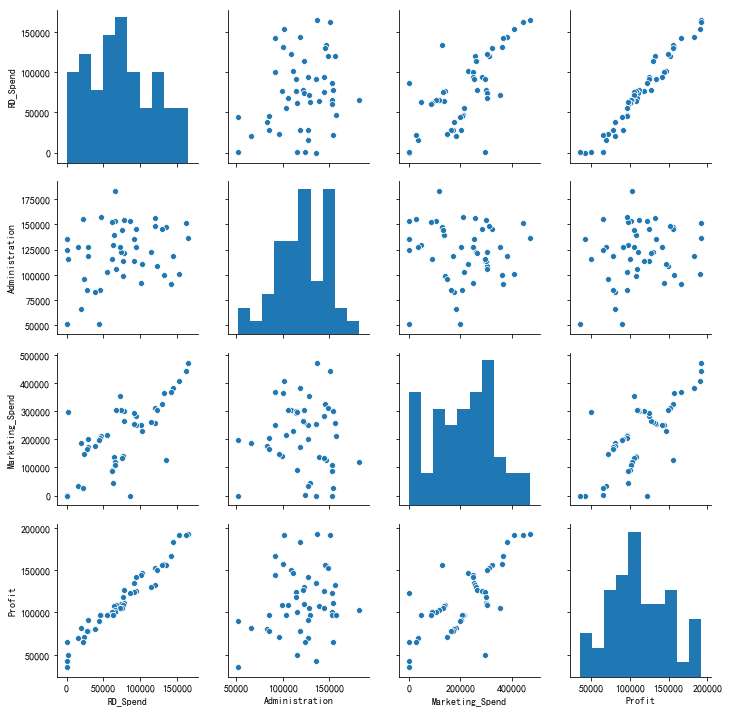

In [85]:
# 散点图矩阵
# 导入模块
import matplotlib.pyplot as plt
import seaborn
# 绘制散点图矩阵
seaborn.pairplot(Profit_New.ix[:,['RD_Spend','Administration','Marketing_Spend','Profit']])
# 显示图形
plt.show()

In [86]:
# 模型修正
model3 = sm.formula.ols('Profit ~ RD_Spend + Marketing_Spend', data = train).fit()
# 模型回归系数的估计值
model3.params

Intercept          51902.112471
RD_Spend               0.785116
Marketing_Spend        0.019402
dtype: float64

In [99]:
# 异常值检验
outliers = model3.get_influence()

# 高杠杆值点（帽子矩阵）
leverage = outliers.hat_matrix_diag
# dffits值
dffits = outliers.dffits[0]
# 学生化残差
resid_stu = outliers.resid_studentized_external
# cook距离
cook = outliers.cooks_distance[0]

# 合并各种异常值检验的统计量值
contat1 = pd.concat([pd.Series(leverage, name = 'leverage'),pd.Series(dffits, name = 'dffits'),
                     pd.Series(resid_stu,name = 'resid_stu'),pd.Series(cook, name = 'cook')],axis = 1)
contat1.head()

# 重设train数据的行索引
train.index = range(train.shape[0])

# 将上面的统计量与train数据集合并
profit_outliers = pd.concat([train,contat1], axis = 1)
profit_outliers.head()

,leverage,dffits,resid_stu,cook
0,0.066517,0.466410,1.747255,0.068601
1,0.093362,0.221230,0.689408,0.016556
2,0.032741,-0.156225,-0.849138,0.008199
3,0.039600,0.270677,1.332998,0.023906
4,0.042983,-0.228563,-1.078496,0.017335


,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida,leverage,dffits,resid_stu,cook
0,28663.76,127056.21,201126.82,90708.19,0,1,0.066517,0.466410,1.747255,0.068601
1,15505.73,127382.30,35534.17,69758.98,0,0,0.093362,0.221230,0.689408,0.016556
2,94657.16,145077.58,282574.31,125370.37,0,0,0.032741,-0.156225,-0.849138,0.008199
3,101913.08,110594.11,229160.95,146121.95,0,1,0.039600,0.270677,1.332998,0.023906
4,78389.47,153773.43,299737.29,111313.02,0,0,0.042983,-0.228563,-1.078496,0.017335


In [109]:
np.where((np.abs(profit_outliers.resid_stu)>2),1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [116]:
# 计算异常值数量的比例
outliers_ratio = sum(np.where((np.abs(profit_outliers.resid_stu)>2),1,0))/profit_outliers.shape[0]
outliers_ratio
# 挑选出非异常的观测点
none_outliers = profit_outliers.ix[np.abs(profit_outliers.resid_stu)<=2,]

# 应用无异常值的数据集重新建模
model4 = sm.formula.ols('Profit ~ RD_Spend + Marketing_Spend', data = none_outliers).fit()
model4.params

0.02564102564102564

Intercept          51827.416821
RD_Spend               0.797038
Marketing_Spend        0.017740
dtype: float64

In [111]:
# Durbin-Watson统计量
# 模型概览
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     520.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.16e-27
Time:                        01:27:24   Log-Likelihood:                -389.18
No. Observations:                  38   AIC:                             784.4
Df Residuals:                      35   BIC:                             789.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.183e+04   2501.192     20.721      0.000    4.67e+04    5.69e+04
RD_Spend            0.7970      0.034     23.261      0.000       0.727       0.867
Marketing_Spend     0.0177      0.013      1.391      0.173      -0.008       0.044
==============================================================================
Omnibus:                        7.188   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.744
Skew:                           0.321   Prob(JB):                        0.254
Kurtosis:                       1.851   Cond. No.                     5.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0, 'RD_Spend')

Text(0, 0.5, 'Std_Residual')

Text(0.5, 0, 'Marketing_Spend')

Text(0, 0.5, 'Std_Residual')

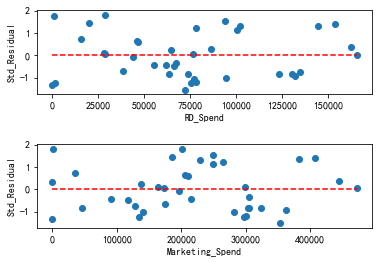

In [112]:
# 方差齐性检验
# 设置第一张子图的位置
ax1 = plt.subplot2grid(shape = (2,1), loc = (0,0))
# 绘制散点图
ax1.scatter(none_outliers.RD_Spend, (model4.resid-model4.resid.mean())/model4.resid.std())  # model.resid = yi-yi_hat
# 添加水平参考线
ax1.hlines(y = 0 ,xmin = none_outliers.RD_Spend.min(),xmax = none_outliers.RD_Spend.max(), color = 'red', linestyles = '--')
# 添加x轴和y轴标签
ax1.set_xlabel('RD_Spend')
ax1.set_ylabel('Std_Residual')

# 设置第二张子图的位置
ax2 = plt.subplot2grid(shape = (2,1), loc = (1,0))
# 绘制散点图
ax2.scatter(none_outliers.Marketing_Spend, (model4.resid-model4.resid.mean())/model4.resid.std())
# 添加水平参考线
ax2.hlines(y = 0 ,xmin = none_outliers.Marketing_Spend.min(),xmax = none_outliers.Marketing_Spend.max(), color = 'red', linestyles = '--')
# 添加x轴和y轴标签
ax2.set_xlabel('Marketing_Spend')
ax2.set_ylabel('Std_Residual')

# 调整子图之间的水平间距和高度间距
plt.subplots_adjust(hspace=0.6, wspace=0.3)
# 显示图形
plt.show()

In [119]:
# BP检验
sm.stats.diagnostic.het_breushpagan(model4.resid, exog_het = model4.model.exog)

(1.4675103668307752,
 0.48010272699007805,
 0.7029751237162184,
 0.5019659740963014)

In [120]:
# 模型预测
# model4对测试集的预测
pred4 = model4.predict(exog = test.ix[:,['RD_Spend','Marketing_Spend']])
# 对比预测值与实际值
pd.DataFrame({'Prediction':pred4,'Real':test.Profit})

,Prediction,Real
8,153432.247049,152211.77
48,52259.451168,35673.41
14,151977.141752,132602.65
42,73295.606990,71498.49
29,106018.053241,101004.64
44,70006.559786,65200.33
4,171588.008207,166187.94
31,102120.376355,97483.56
13,129630.995695,134307.35
18,130186.711028,124266.90


Text(0.5, 0, '实际值')

Text(0, 0.5, '预测值')

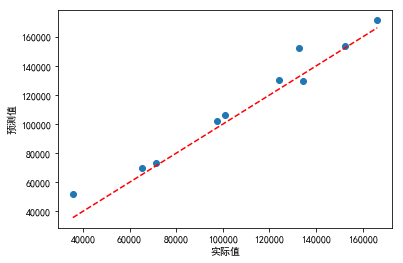

In [121]:
# 绘制预测值与实际值的散点图
plt.scatter(x = test.Profit, y = pred4)
# 添加斜率为1，截距项为0的参考线
plt.plot([test.Profit.min(),test.Profit.max()],[test.Profit.min(),test.Profit.max()],
        color = 'red', linestyle = '--')
# 添加轴标签
plt.xlabel('实际值')
plt.ylabel('预测值')
# 显示图形
plt.show()